# Info

The purpose of this notebook is some parameter tuning. I'm going to start adding new .ipynb files to help with organization.

# Import Packages

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from martingale import ds_names, full_run, plot_results, grid_search_by_szn, param_boxplot

# Parameter Tuning

grid search complete


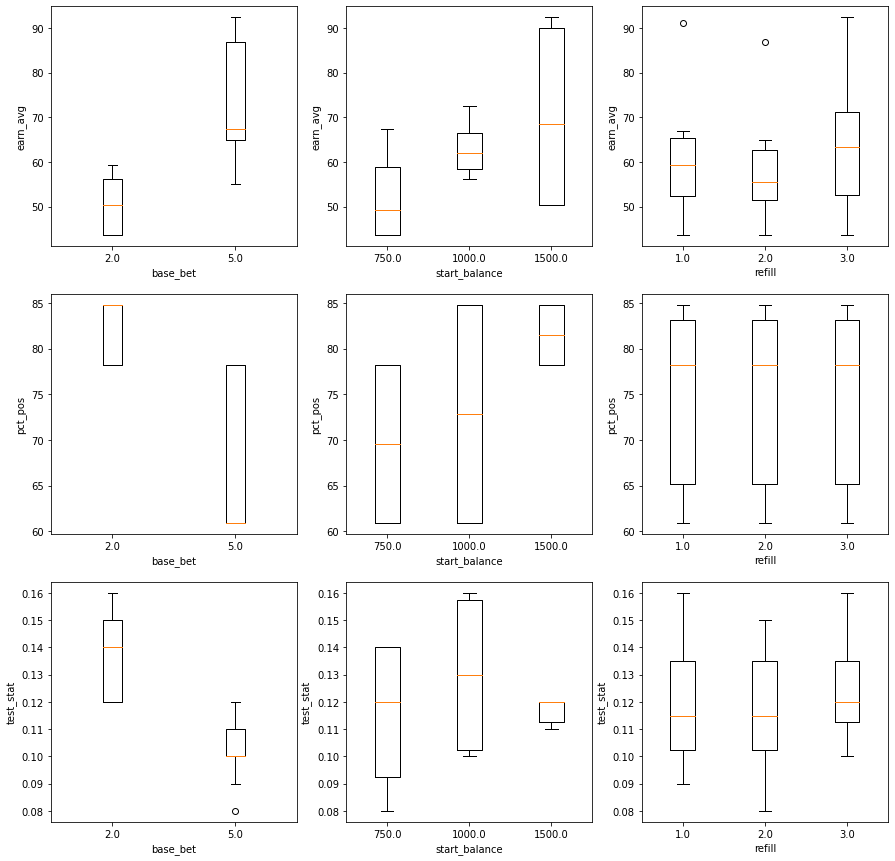

In [7]:
# grid search by season
params = {'base_bet': [2, 5],
          'start_balance': [750, 1000, 1500],
          'refill': [1, 2, 3]
         }
param_gs = grid_search_by_szn(71, params) # later: adjust win number

# analyze effect of parameters
mpl.rcParams["figure.figsize"] = [15,15]

plt.subplot(3,3,1)
param_boxplot(param_gs, 'base_bet', 'earn_avg')

plt.subplot(3,3,2)
param_boxplot(param_gs, 'start_balance', 'earn_avg')

plt.subplot(3,3,3)
param_boxplot(param_gs, 'refill', 'earn_avg')

plt.subplot(3,3,4)
param_boxplot(param_gs, 'base_bet', 'pct_pos')

plt.subplot(3,3,5)
param_boxplot(param_gs, 'start_balance', 'pct_pos')

plt.subplot(3,3,6)
param_boxplot(param_gs, 'refill', 'pct_pos')

plt.subplot(3,3,7)
param_boxplot(param_gs, 'base_bet', 'test_stat')

plt.subplot(3,3,8)
param_boxplot(param_gs, 'start_balance', 'test_stat')

plt.subplot(3,3,9)
param_boxplot(param_gs, 'refill', 'test_stat')

### Discussion

* note: earn_avg, pct_pos, and test_stat are all in desirable ranges with these parameters. further tuning is just to improve outcomes even more
* base_bet: 2 and 5 both seem like very valid options. test in between to see if a sweet spot exists
* start_balance: it seems like the higher, the more desirable outcomes. The interesting thing is that a higher start balance seems to correlate to less variance in pct_pos and test_stat, but a higher variance in earn_avg. I'm going to add some larger balances to see if this is true.
* refill: refill is becoming less significant now, with how much I'm raising the starting balance. From now on, it seems reasonable to fix this at 3.

grid search complete


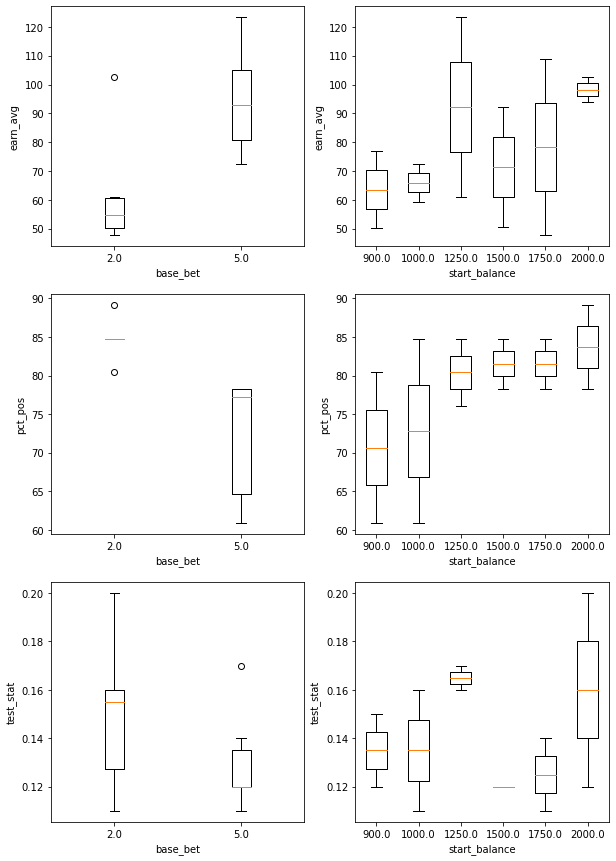

In [11]:
# grid search by season
params = {'base_bet': [2, 5],
          'start_balance': [900, 1000, 1250, 1500, 1750, 2000],
          'refill': [3]
         }
param_gs = grid_search_by_szn(71, params) # later: adjust win number

# analyze effect of parameters
mpl.rcParams["figure.figsize"] = [10, 15]

plt.subplot(3,2,1)
param_boxplot(param_gs, 'base_bet', 'earn_avg')

plt.subplot(3,2,2)
param_boxplot(param_gs, 'start_balance', 'earn_avg')

plt.subplot(3,2,3)
param_boxplot(param_gs, 'base_bet', 'pct_pos')

plt.subplot(3,2,4)
param_boxplot(param_gs, 'start_balance', 'pct_pos')

plt.subplot(3,2,5)
param_boxplot(param_gs, 'base_bet', 'test_stat')

plt.subplot(3,2,6)
param_boxplot(param_gs, 'start_balance', 'test_stat')

### Discussion

* base_bet will be tested further in the next step
* start_balance: after testing higher values, it seems like higher start balance correlates to higher pct_pos. however, there seems to be a sweer spot for the other two outcome variables around 1250. I will fix that for now.

grid search complete


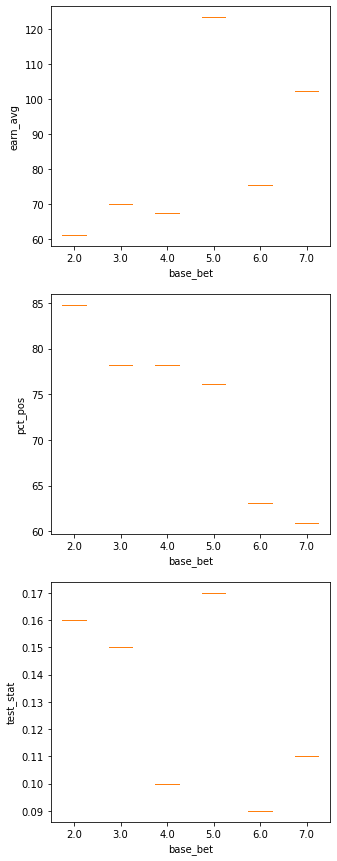

In [13]:
# grid search by season
params = {'base_bet': [2, 3, 4, 5, 6, 7],
          'start_balance': [1250],
          'refill': [3]
         }
param_gs = grid_search_by_szn(71, params) # later: adjust win number

# analyze effect of parameters
mpl.rcParams["figure.figsize"] = [5, 15]

plt.subplot(3,1,1)
param_boxplot(param_gs, 'base_bet', 'earn_avg')

plt.subplot(3,1,2)
param_boxplot(param_gs, 'base_bet', 'pct_pos')

plt.subplot(3,1,3)
param_boxplot(param_gs, 'base_bet', 'test_stat')

### Discussion
* base_bet: a base_bet of 5 seems optimal for earn_avg and test_stat. The pct_pos is still somewhat high, so we will fix base_bet at 5 from now on

# Analysis with tuned parameters

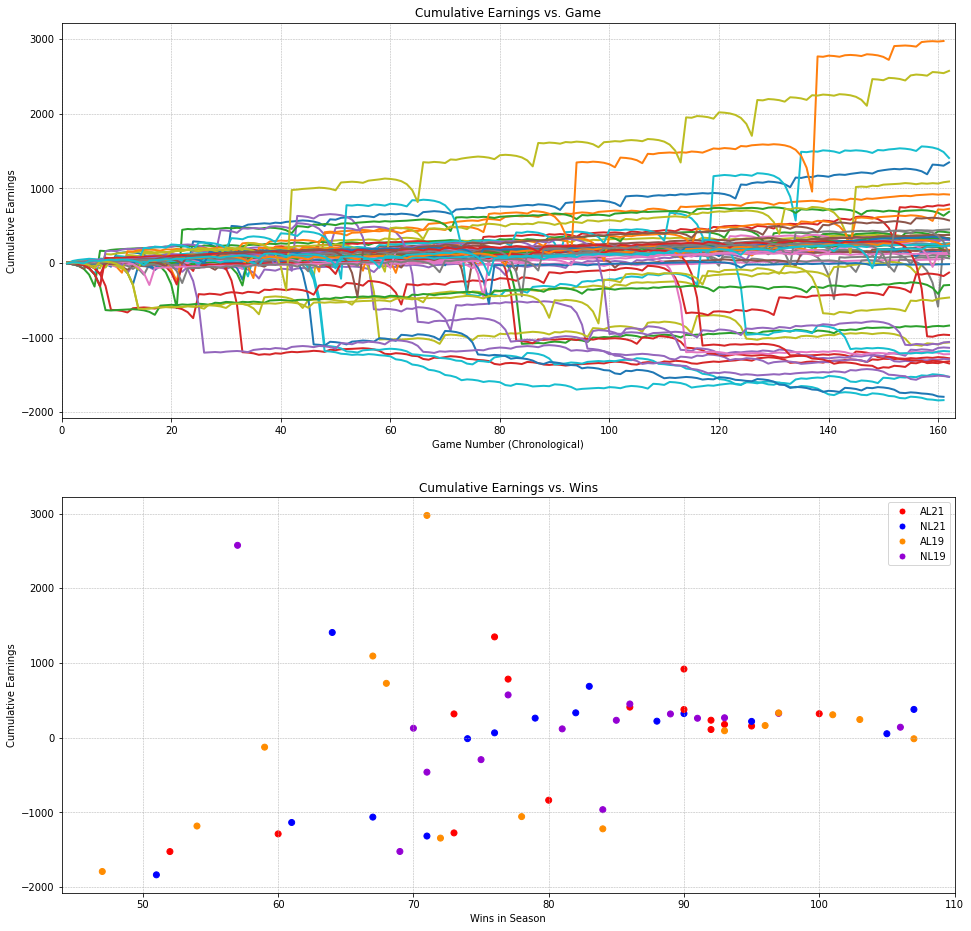

In [2]:
# run once with best parameters: base_bet = 5, start_balance = 1250, refill = 3
bet_data, team_data = full_run(ds_names(), 5, 1250, 3)

# plot results
plot_results(bet_data, team_data)

### Discussion
* I was hoping the results would look something like this. Most of the teams with a win percentage >= .500 resulted in positive cumulative earnings (the exception was about 3 teams). These seem like good parameters to go with. As of right now, it seems like using this strategy on a team that you believe will go over .500 will almost surely be positive.